# **Harshit Jaiswal**
**GitHub: [Click](https://github.com/harshitt018)**  
**LinkedIn: [Click](https://www.linkedin.com/in/harshit-jaiswal-a05835298/)**

# **Optimization Techniques Deep Learning**  
**Implementing all the optimizers commonly used in deep learning**

**Optimizers: ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta”, ‘Nadam']**

**-> Stochastic Gradient Descent (SGD)**

**-> Adam**

**-> RMSprop**

**-> Adagrad**

**-> Adadelta**

**-> Nadam**

# **Importing Required Libraries**

In [18]:
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

# **Example**

Training with SGD...
Training with Adam...
Training with RMSprop...
Training with Adagrad...
Training with Adadelta...
Training with Nadam...


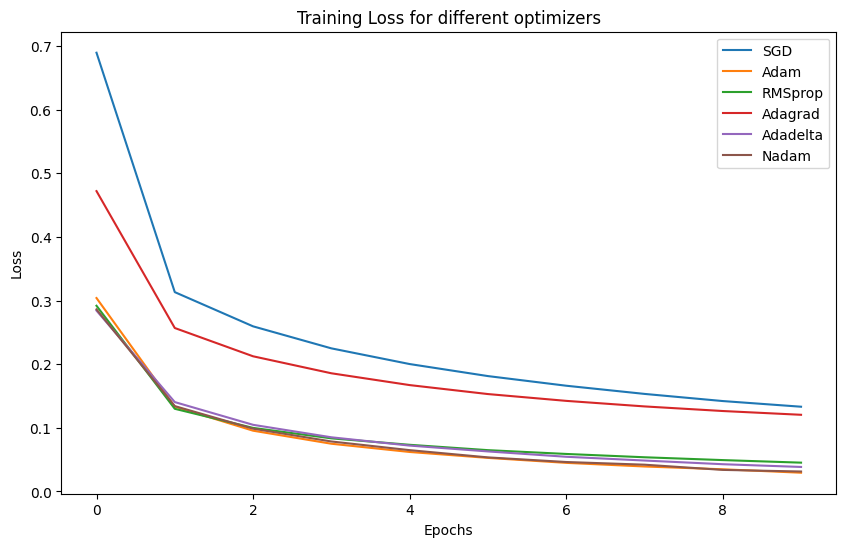

In [17]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model creation function
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(64, input_dim=784, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# List of optimizers
optimizers = [
    SGD(learning_rate=0.01),
    Adam(learning_rate=0.001),
    RMSprop(learning_rate=0.001),
    Adagrad(learning_rate=0.01),
    Adadelta(learning_rate=1.0),
    Nadam(learning_rate=0.001)
]
optimizer_names = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Nadam']
history_dict = {}

# Train model with each optimizer and store the loss history
for optimizer, opt_name in zip(optimizers, optimizer_names):
    model = create_model(optimizer)
    print(f"Training with {opt_name}...")

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    history_dict[opt_name] = history.history['loss']

# Plotting the training loss for each optimizer
plt.figure(figsize=(10, 6))
for optimizer_name, loss in history_dict.items():
    plt.plot(loss, label=optimizer_name)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for different optimizers')
plt.legend()
plt.show()


# **Another Example**

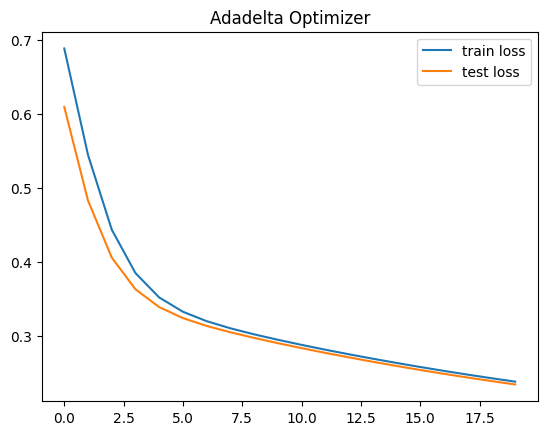

Train Loss and Accuracy: [0.23541446030139923, 0.7112833261489868]
Test Loss and Accuracy: [0.23385879397392273, 0.7199000120162964]



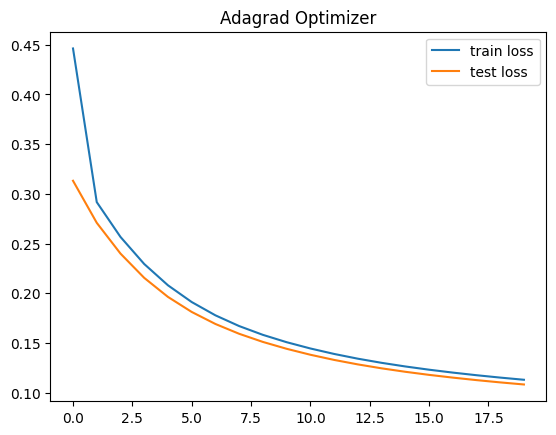

Train Loss and Accuracy: [0.11190870404243469, 0.8676166534423828]
Test Loss and Accuracy: [0.10822270810604095, 0.878600001335144]



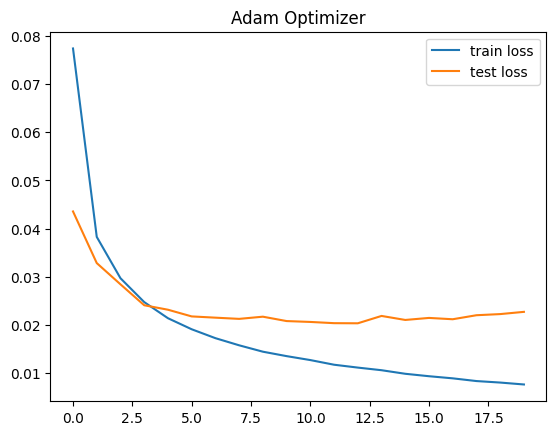

Train Loss and Accuracy: [0.006052827928215265, 0.9949333071708679]
Test Loss and Accuracy: [0.022702688351273537, 0.9746000170707703]



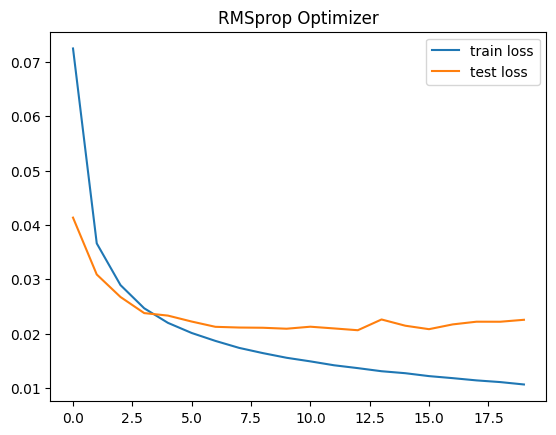

Train Loss and Accuracy: [0.009434984996914864, 0.9902166724205017]
Test Loss and Accuracy: [0.0225235503166914, 0.9735000133514404]



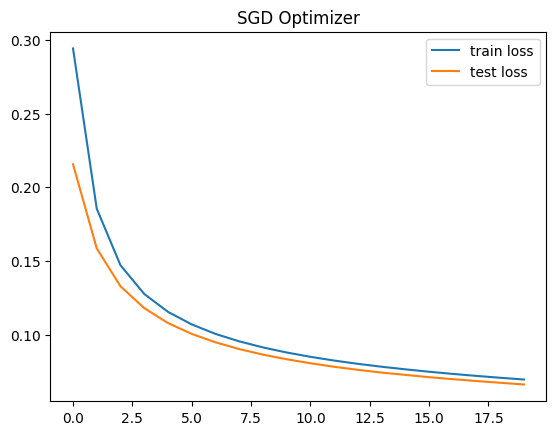

Train Loss and Accuracy: [0.06888631731271744, 0.9053833484649658]
Test Loss and Accuracy: [0.06614195555448532, 0.9118000268936157]



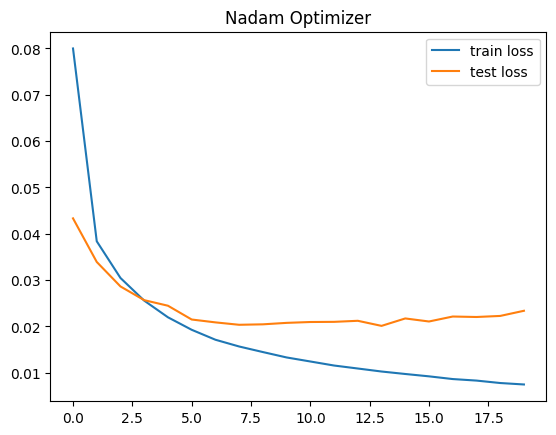

Train Loss and Accuracy: [0.0071357982233166695, 0.9932000041007996]
Test Loss and Accuracy: [0.02337992936372757, 0.9726999998092651]



In [21]:
# Function to build the model
def build_model(optimizer):
    model = Sequential()
    model.add(Dense(50, input_dim=784, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# List of optimizer names
optimizer_names = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD', 'Nadam']
optimizers = [Adadelta(), Adagrad(), Adam(), RMSprop(), SGD(), Nadam()]

# Loop over each optimizer and train the model
for i, opt_name in enumerate(optimizer_names):
    model = build_model(optimizers[i])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)

    # Evaluate the model
    train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Plot the loss for training and validation sets
    pyplot.title(opt_name + ' Optimizer')
    pyplot.plot(history.history['loss'], label='train loss')
    pyplot.plot(history.history['val_loss'], label='test loss')
    pyplot.legend()
    pyplot.show()

    # Print the evaluation results
    print("Train Loss and Accuracy:", train_acc)
    print("Test Loss and Accuracy:", test_acc)
    print()